Zadanie:

Na podstawie danych w pliku messy_data.csv przygotuj interaktywny dashboard do analizy danych.
Etapy pracy domowej:
1.	wstępna analiza danych i czyszczenie
a.	duplikaty
b.	wartości odstające
c.	spójność
d.	braki w danych
e.	skala wartości 
f.	inne
2.	wizualizacja rozkładu zmiennych, zależności ceny od innych zmiennych, liczebność kategorii 
3.	budowa modelu regresji ceny od pozostałych zmiennych. Istotne zmienne należy wybrać eliminacją wsteczną lub selekcją postępującą.
4.	wizualizacja modelu regresji
5.	stworzenie dashboardu z powyższymi wizualizacjami i próbką danych w postaci tabeli. Dashboard powinien umożliwiać zmianę parametrów wykresów - np. zależność ceny od innej, wybranej przez użytkownika zmiennej

Wszystkie wizualizacje i dane powinny zostać zaprezentowane w postaci dashboardu. Etapy czyszczenia danych i budowy modelu regresji należy zawrzeć w notatniku Jupytera (.ipynb).

In [81]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import plotly.graph_objects as go

In [82]:
df = pd.read_csv('messy_data.csv', skipinitialspace=True)


In [83]:
df.replace({" " : np.nan}, inplace=True)
df

,carat,clarity,color,cut,x dimension,y dimension,z dimension,depth,table,price
0,0.50,IF,D,Ideal,5.1,5.15,3.20,61.5,NaN,3000.0
1,0.70,vvs2,E,premium,5.7,NaN,3.52,62.0,59.0,4500.0
2,NaN,Si2,h,Good,4.3,4.31,NaN,62.3,56.0,700.0
3,1.20,if,d,ideal,NaN,6.82,4.20,61.7,58.0,10000.0
4,0.90,I1,J,Fair,6.0,NaN,3.70,61.7,NaN,2400.0
...,...,...,...,...,...,...,...,...,...,...
195,0.45,si1,F,very good,4.9,4.89,NaN,62.4,59.0,2300.0
196,1.25,VVS2,H,Good,6.9,NaN,4.27,NaN,55.0,10400.0
197,0.55,i1,I,Premium,5.3,NaN,3.28,62.3,57.0,150000.0
198,0.85,Si2,E,fair,6.1,6.13,3.78,NaN,58.0,6300.0


Sparwdzenie brakujących wartości

In [84]:
df.isna().any()

carat           True
clarity        False
color          False
cut            False
x dimension     True
y dimension     True
z dimension     True
depth           True
table           True
price           True
dtype: bool

Suma brakujących wartości

In [85]:
df.isna().sum()

carat          50
clarity         0
color           0
cut             0
x dimension     3
y dimension    64
z dimension    48
depth          67
table          33
price           4
dtype: int64

Convert all string columns to lowercase for consistency

In [86]:
string_columns = ['clarity', 'color', 'cut']
df[string_columns] = df[string_columns].apply(lambda x: x.str.lower())


Convert all numeric columns to numeric type

In [87]:
numeric_columns = ['carat', 'x dimension', 'y dimension', 'z dimension', 'depth', 'table', 'price']
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

Drop all prices where price > 100000

In [88]:
threshold_price = 100000
df = df[df['price'] <= threshold_price]


Drop duplicates

In [89]:
df = df.drop_duplicates()
df

,carat,clarity,color,cut,x dimension,y dimension,z dimension,depth,table,price
0,0.50,if,d,ideal,5.1,5.15,3.20,61.5,NaN,3000.0
1,0.70,vvs2,e,premium,5.7,NaN,3.52,62.0,59.0,4500.0
2,NaN,si2,h,good,4.3,4.31,NaN,62.3,56.0,700.0
3,1.20,if,d,ideal,NaN,6.82,4.20,61.7,58.0,10000.0
4,0.90,i1,j,fair,6.0,NaN,3.70,61.7,NaN,2400.0
...,...,...,...,...,...,...,...,...,...,...
194,0.95,si1,g,ideal,6.4,6.42,3.96,NaN,56.0,7100.0
195,0.45,si1,f,very good,4.9,4.89,NaN,62.4,59.0,2300.0
196,1.25,vvs2,h,good,6.9,NaN,4.27,NaN,55.0,10400.0
198,0.85,si2,e,fair,6.1,6.13,3.78,NaN,58.0,6300.0


Fill NaN by avarage values for each column

In [90]:
df.fillna(df.mean(), inplace=True)
df


/var/folders/hh/x0mqlgtj6cxch2xk6mm0gt6h0000gn/T/ipykernel_56306/1818430782.py:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



,carat,clarity,color,cut,x dimension,y dimension,z dimension,depth,table,price
0,0.500000,if,d,ideal,5.100000,5.150000,3.200000,61.500000,56.867925,3000.0
1,0.700000,vvs2,e,premium,5.700000,5.856412,3.520000,62.000000,59.000000,4500.0
2,0.796552,si2,h,good,4.300000,4.310000,3.700966,62.300000,56.000000,700.0
3,1.200000,if,d,ideal,5.891534,6.820000,4.200000,61.700000,58.000000,10000.0
4,0.900000,i1,j,fair,6.000000,5.856412,3.700000,61.700000,56.867925,2400.0
...,...,...,...,...,...,...,...,...,...,...
194,0.950000,si1,g,ideal,6.400000,6.420000,3.960000,62.334127,56.000000,7100.0
195,0.450000,si1,f,very good,4.900000,4.890000,3.700966,62.400000,59.000000,2300.0
196,1.250000,vvs2,h,good,6.900000,5.856412,4.270000,62.334127,55.000000,10400.0
198,0.850000,si2,e,fair,6.100000,6.130000,3.780000,62.334127,58.000000,6300.0


Wizualizacja rozkładu zmiennych, zależności ceny od innych zmiennych, liczebność kategorii 

Rozkład zmiennych numerycznych

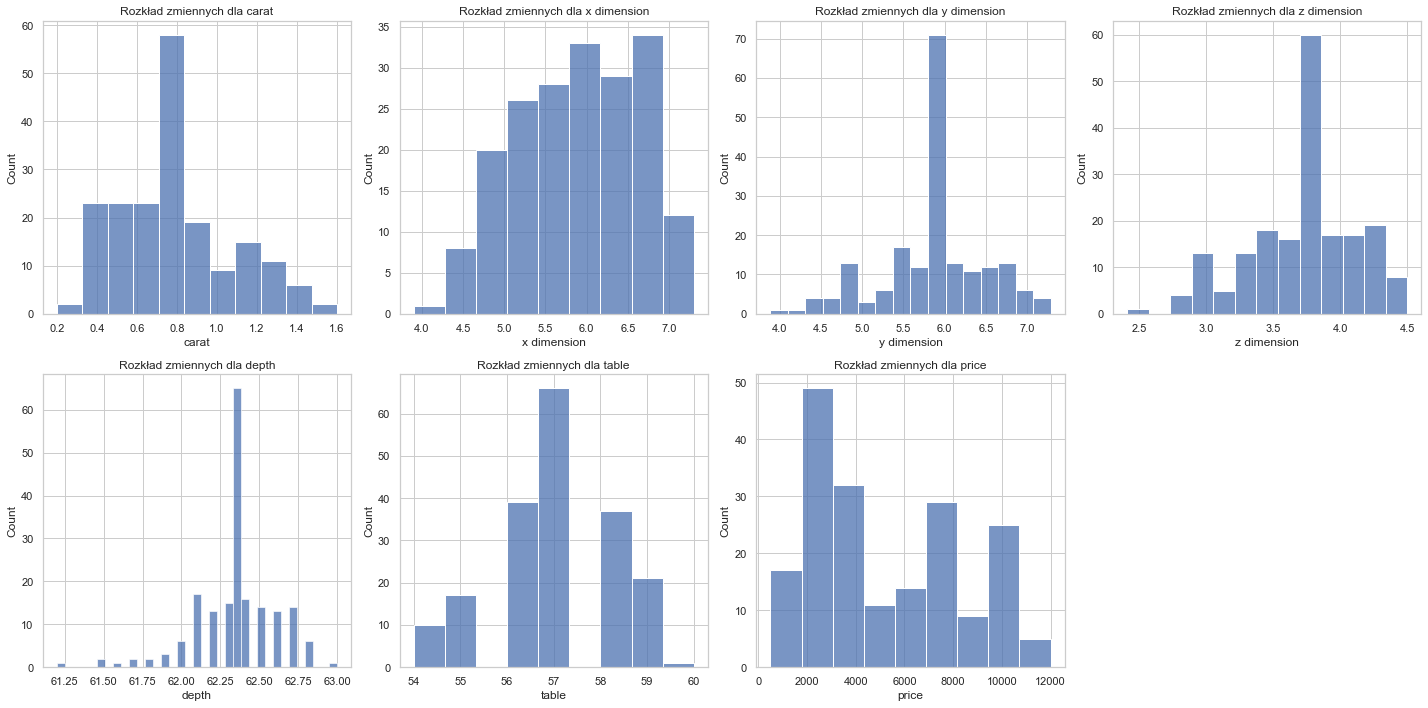

In [91]:
numeric_columns = ['carat', 'x dimension', 'y dimension', 'z dimension', 'depth', 'table', 'price']
sns.set(style='whitegrid')
plt.figure(figsize=(20, 10))

for i, column in enumerate(numeric_columns, 1):
    plt.subplot(2,4,i)
    sns.histplot(df[column].dropna())
    plt.title(f'Rozkład zmiennych dla {column}')

plt.tight_layout()
plt.show()

Cena vs. inne wartości numeryczne

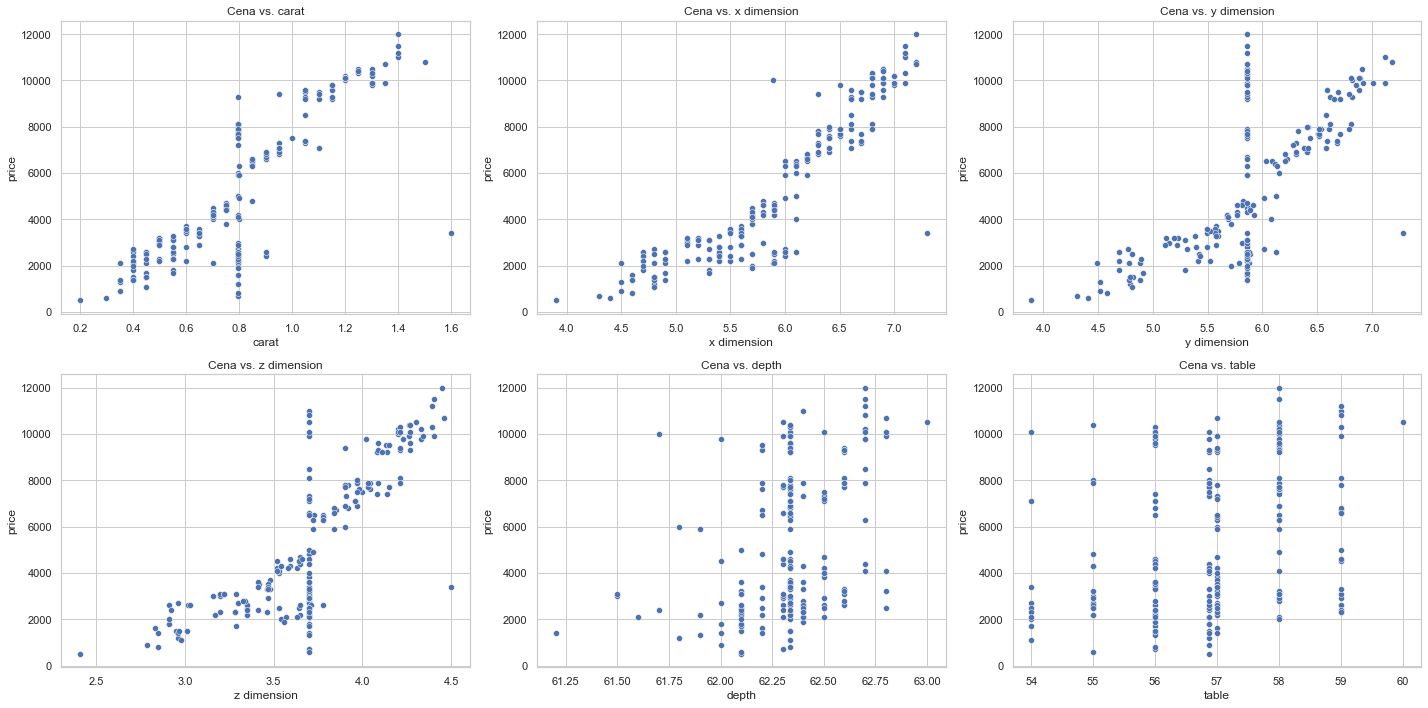

In [92]:
sns.set(style='whitegrid')
plt.figure(figsize=(20, 10))

for i, column in enumerate(['carat', 'x dimension', 'y dimension', 'z dimension', 'depth', 'table'], 1):
    plt.subplot(2,3,i)
    sns.scatterplot(data=df, x=column, y='price')
    plt.title(f'Cena vs. {column}')

plt.tight_layout()
plt.show()

Liczebność kategorii

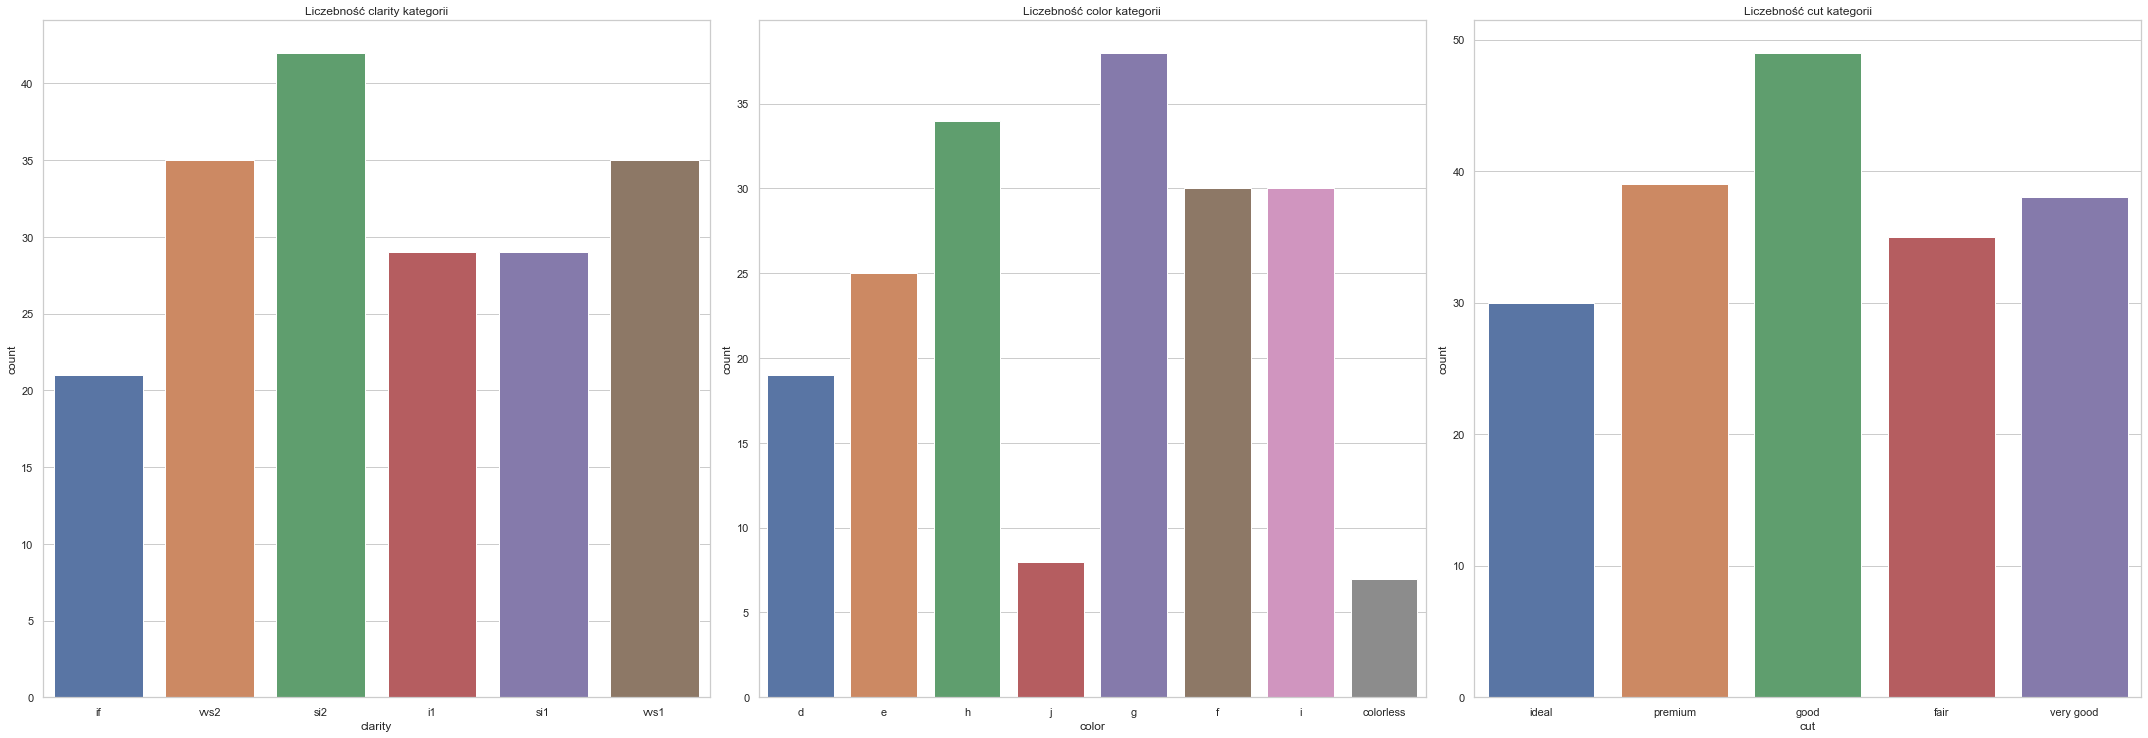

In [93]:
sns.set(style='whitegrid')
plt.figure(figsize=(30, 20))

for i, column in enumerate(['clarity', 'color', 'cut'], 1):
    plt.subplot(2,3,i)
    sns.countplot(data=df, x=column)
    plt.title(f'Liczebność {column} kategorii')

plt.tight_layout()
plt.show()

Budowa modelu regresji ceny od pozostałych zmiennych. Istotne zmienne należy wybrać eliminacją wsteczną lub selekcją postępującą.

In [94]:
df = df.rename(columns={'x dimension': 'x_dimension', 'y dimension': 'y_dimension', 'z dimension': 'z_dimension'})

model = smf.ols(formula="price ~ carat + x_dimension + y_dimension + z_dimension + depth + table", data=df).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     165.3
Date:                Sat, 03 Feb 2024   Prob (F-statistic):           2.48e-71
Time:                        11:42:14   Log-Likelihood:                -1630.2
No. Observations:                 191   AIC:                             3274.
Df Residuals:                     184   BIC:                             3297.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -5.849e+04   2.53e+04     -2.308      

Wizualizacja modelu regresji

In [95]:
df["fitted"] = model.fittedvalues
fig = go.Figure()

In [96]:
fig.add_trace(go.Scatter(x=df["price"], y=df["fitted"], mode='markers', name='Price'))
fig.add_trace(go.Scatter(x=df["price"], y=df["price"], mode='lines', name='X vs Y Line'))

fig.update_layout(title="Fitted Values vs. Original Values of Diamonds",
                  xaxis_title="Original Values of Diamonds",
                  yaxis_title="Fitted Values")

fig.show()


Stworzenie dashboardu z powyższymi wizualizacjami i próbką danych w postaci tabeli. Dashboard powinien umożliwiać zmianę parametrów wykresów - np. zależność ceny od innej, wybranej przez użytkownika zmiennej

Streamlit/plotly - dashdoard.py. Run: run dashboard.py